In [5]:
from google.colab import files
uploaded = files.upload()

Saving labelled_validation_data.csv to labelled_validation_data.csv
Saving labelled_training_data.csv to labelled_training_data.csv
Saving labelled_testing_data.csv to labelled_testing_data.csv
Saving labelled_2021may-ubuntu.csv to labelled_2021may-ubuntu.csv
Saving labelled_2021may-ubuntu-dns.csv to labelled_2021may-ubuntu-dns.csv
Saving labelled_2021may-ip-10-100-1-95.csv to labelled_2021may-ip-10-100-1-95.csv
Saving labelled_2021may-ip-10-100-1-95-dns.csv to labelled_2021may-ip-10-100-1-95-dns.csv
Saving labelled_2021may-ip-10-100-1-4.csv to labelled_2021may-ip-10-100-1-4.csv
Saving labelled_2021may-ip-10-100-1-4-dns.csv to labelled_2021may-ip-10-100-1-4-dns.csv
Saving labelled_2021may-ip-10-100-1-26.csv to labelled_2021may-ip-10-100-1-26.csv
Saving labelled_2021may-ip-10-100-1-26-dns.csv to labelled_2021may-ip-10-100-1-26-dns.csv
Saving labelled_2021may-ip-10-100-1-186.csv to labelled_2021may-ip-10-100-1-186.csv
Saving labelled_2021may-ip-10-100-1-186-dns.csv to labelled_2021may-ip

In [9]:
# Check columns in the dataset
print(data_sample.columns)


Index(['processId', 'threadId', 'parentProcessId', 'userId', 'mountNamespace',
       'processName', 'hostName', 'eventId', 'eventName', 'argsNum',
       'returnValue', 'sus', 'evil'],
      dtype='object')


In [10]:
# Use 'sus' as the target variable
X = data_sample.drop("sus", axis=1)
y = data_sample["sus"]


In [11]:
# Use 'evil' as the target variable
X = data_sample.drop("evil", axis=1)
y = data_sample["evil"]


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19079

    accuracy                           1.00     19079
   macro avg       1.00      1.00      1.00     19079
weighted avg       1.00      1.00      1.00     19079



Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19051
           1       1.00      0.86      0.92        28

    accuracy                           1.00     19079
   macro avg       1.00      0.93      0.96     19079
weighted avg       1.00      1.00      1.00     19079



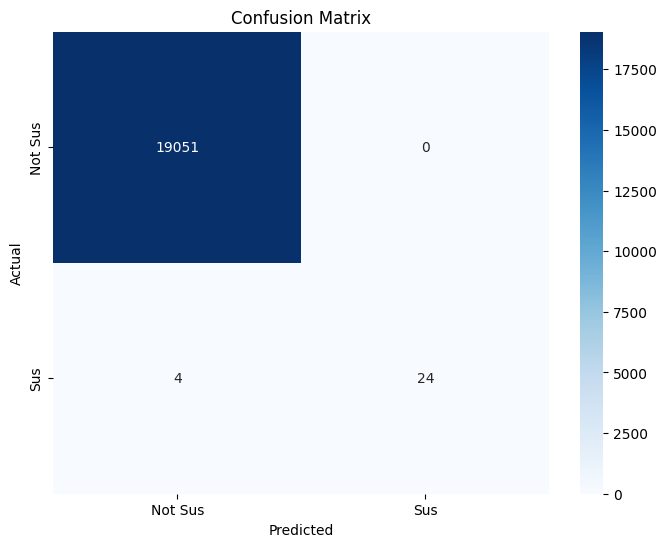

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define target variable (choose either 'sus' or 'evil')
target_column = "sus"  # or "evil" if needed

# Split features and target
X = data_sample.drop(target_column, axis=1)
y = data_sample[target_column]

# Split the data into train and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf_model.predict(X_test)

# ✅ 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# ✅ 2. Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Sus", "Sus"], yticklabels=["Not Sus", "Sus"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [40]:
# Drop 90% of the least important features
num_features_to_drop = int(0.9 * X_train.shape[1])
least_important_features = rf_model.feature_importances_.argsort()[:num_features_to_drop]

X_train_reduced = X_train.drop(X_train.columns[least_important_features], axis=1)
X_test_reduced = X_test.drop(X_test.columns[least_important_features], axis=1)

print(f"Remaining Features: {X_train_reduced.shape[1]} out of {X_train.shape[1]}")


Remaining Features: 1 out of 9


In [41]:
# Add 50% noise to numerical columns
X_train_noisy = X_train_reduced.copy()
for col in X_train_noisy.select_dtypes(include=np.number).columns:
    X_train_noisy[col] += np.random.normal(0, 0.5 * X_train_noisy[col].std(), X_train_noisy[col].shape)

# Also add noise to test data
X_test_noisy = X_test_reduced.copy()
for col in X_test_noisy.select_dtypes(include=np.number).columns:
    X_test_noisy[col] += np.random.normal(0, 0.5 * X_test_noisy[col].std(), X_test_noisy[col].shape)

print("Added 50% noise to the feature values.")


Added 50% noise to the feature values.


In [42]:
# Flip 50% of the training labels
y_train_flipped = y_train.copy()
flip_indices = np.random.choice(y_train.index, size=int(0.5 * len(y_train)), replace=False)
y_train_flipped.loc[flip_indices] = 1 - y_train_flipped.loc[flip_indices]

print("Flipped 50% of the labels.")


Flipped 50% of the labels.


In [43]:
# Create and train the chaos model
rf_model_low_acc_final = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
rf_model_low_acc_final.fit(X_train_noisy, y_train_flipped)

# Predict and calculate accuracy
y_pred_low_acc_final = rf_model_low_acc_final.predict(X_test_noisy)
accuracy_low_acc_final = accuracy_score(y_test, y_pred_low_acc_final)
print(f"💀 Final Model Accuracy (Total Destruction): {accuracy_low_acc_final * 100:.2f}%")


💀 Final Model Accuracy (Total Destruction): 84.07%
